In [2]:
using MAT
using LinearAlgebra
using PyPlot; plt = PyPlot
;

In [8]:
path = "/home/asd/data/heart/"

# Load groups
md_groups = matread(path * "groups.mat")
groups = md_groups["groups"]


train_err_dc = []
train_err_conv = []

for gr in groups
    # Load data
    md_dc = matread(string(path, "trainout/64", gr, "_1_1.mat"))
    md_conv = matread(string(path, "trainout/64", gr, "_1_30.mat"))
   
    # Store loss histories
    push!(train_err_dc, md_dc["loss_hist"][end])
    push!(train_err_conv, md_conv["loss_hist"][end])
end

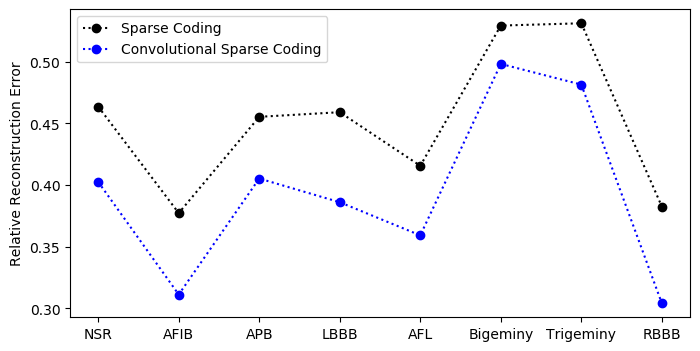

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(1:8, train_err_dc, label="Sparse Coding", color="k", marker="o", linestyle="dotted")
plt.plot(1:8, train_err_conv, label="Convolutional Sparse Coding", color="b", marker="o", linestyle="dotted")
plt.legend()
plt.xticks(1:8, groups)
plt.ylabel("Relative Reconstruction Error")
plt.show()

**Add sparse patches**

In [41]:
train_class_results = matread(string(path, "classify/64train_class_results.mat"))
test_class_results = matread(string(path, "classify/64test_class_results.mat"));

In [36]:
tr_patches = []

for (i, label) in enumerate(train_class_results["labels"])
    patch = vcat(train_class_results["features"][i]...) 
    
    push!(tr_patches, patch)
end

matwrite(
    string(path, "classify/64train_sparse_patches.mat"),
    Dict("patches" => tr_patches, "labels" => train_class_results["labels"])
)

In [43]:
te_patches = []

for (i, label) in enumerate(test_class_results["labels"])
    patch = vcat(test_class_results["features"][i]...) 
    
    push!(te_patches, patch)
end

matwrite(
    string(path, "classify/64test_sparse_patches.mat"),
    Dict("patches" => te_patches, "labels" => test_class_results["labels"])
)

